# Task 1 - Titanic Classification

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the dataset
df = pd.read_excel('C:/Users/Rohit Gupta/Downloads/Titanic_dataset.xlsx')

In [3]:
# Displaying first few rows
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [4]:
print(df.shape)

(1309, 14)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [6]:
# Statistical Analysis of numerical columns
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [7]:
# Checking for missing values
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


### Missing Values are present in the columns like age, cabin, fare,embarked, boat, body,home.dest.

In [8]:
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [9]:
# Dropping columns that won't be used for prediction
df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], inplace=True)

## Handling missing values

In [11]:
# Filling missing values in 'age' with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Filling missing values in 'embarked' with the most common port
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Handle remaining missing values in the 'fare' column
df['fare'].fillna(df['fare'].median(), inplace=True)

In [12]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [22]:
# Feature Engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
df['fare_per_person'] = df['fare'] / df['family_size']

In [23]:
print(df.isnull().sum())

pclass             0
survived           0
age                0
sibsp              0
parch              0
fare               0
sex_male           0
embarked_Q         0
embarked_S         0
family_size        0
is_alone           0
fare_per_person    0
dtype: int64


## Experimenting Through Various Models

In [24]:
X = df.drop(columns=['survived'])
y = df['survived']

In [27]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Random Forest Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
print(f'Random Forest Classification Report:\n {classification_report(y_test, y_pred_rf)}')

Random Forest Accuracy: 0.7786259541984732
Random Forest Confusion Matrix:
 [[123  21]
 [ 37  81]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       144
           1       0.79      0.69      0.74       118

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262



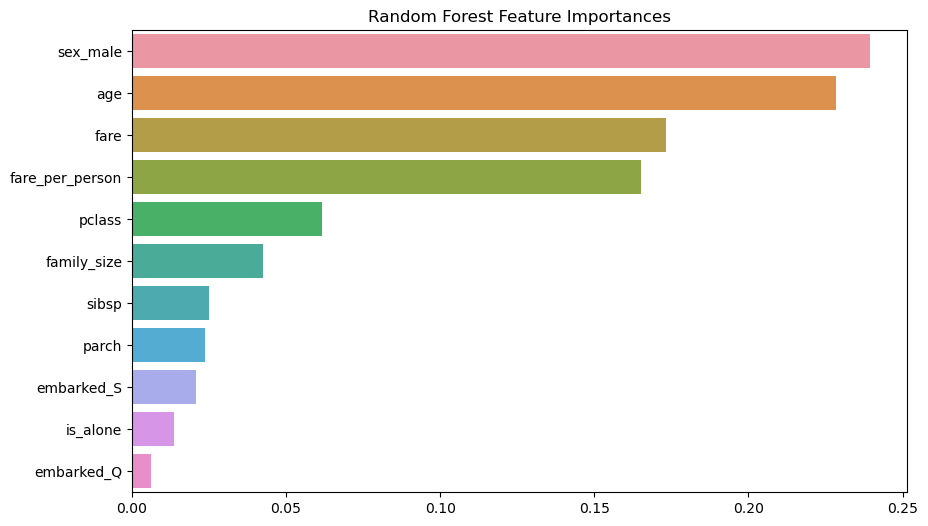

In [28]:
# Feature Importance from Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title('Random Forest Feature Importances')
plt.show()

## Model Performance: 
The Random Forest model performs reasonably well with an accuracy of around 78%, showing a good balance between precision and recall.oles.tures.

## Key Factors for Survival:
- sex_male: Being male had the highest impact.
- Age: Younger passengers had better survival rates.
- Economic Status: Higher fare and higher class passengers had higher survival chances.
- Family Dynamics: Family size and whether the passenger was alone also played roles.

In [29]:
# Model Training with Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Logistic Regression Confusion Matrix:\n {confusion_matrix(y_test, y_pred_lr)}')
print(f'Logistic Regression Classification Report:\n {classification_report(y_test, y_pred_lr)}')

Logistic Regression Accuracy: 0.7748091603053435
Logistic Regression Confusion Matrix:
 [[126  18]
 [ 41  77]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.65      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262



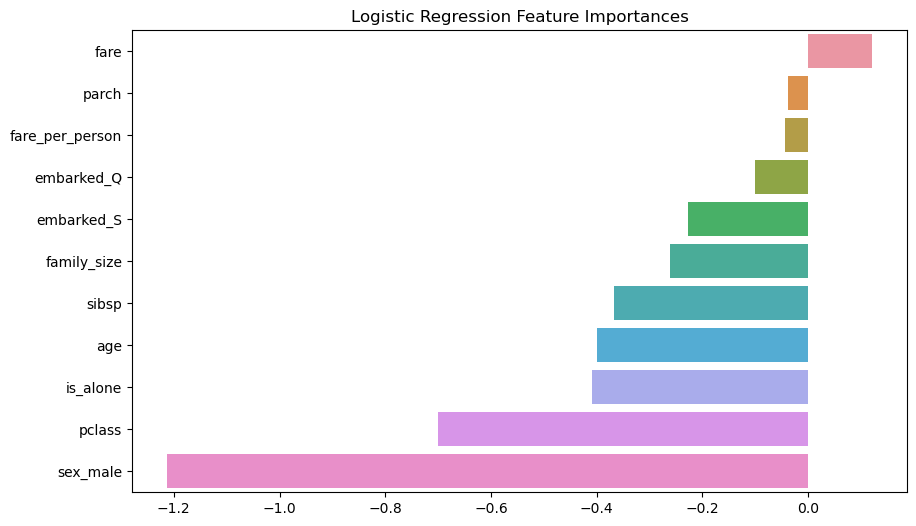

In [30]:
# Feature Importance from Logistic Regression
lr_importances = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=lr_importances, y=lr_importances.index)
plt.title('Logistic Regression Feature Importances')
plt.show()

## Model Performance: 
The Logistic Regression model performs similarly to the Random Forest model with an accuracy of around 77%. It shows a good balance between precision and recall, especially for the class "Not Survived".hances.

## Key Factors for Survival:
- Gender: Being male significantly reduces survival chances.
- Passenger Class: Higher class passengers had better survival rates.
- Family and Companions: Being alone decreased survival chances, while having family members on board increased the chances.
- Age: Younger passengers had better survival rates.
- Fare: Higher fares were associated with higher chances of survival.
- Embarkation Port: Embarkation ports also played a role in survival chances.

In [31]:
# Model Training with SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Model Evaluation
y_pred_svm = svm_model.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'SVM Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svm)}')
print(f'SVM Classification Report:\n {classification_report(y_test, y_pred_svm)}')

SVM Accuracy: 0.767175572519084
SVM Confusion Matrix:
 [[126  18]
 [ 43  75]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.77      0.77      0.76       262



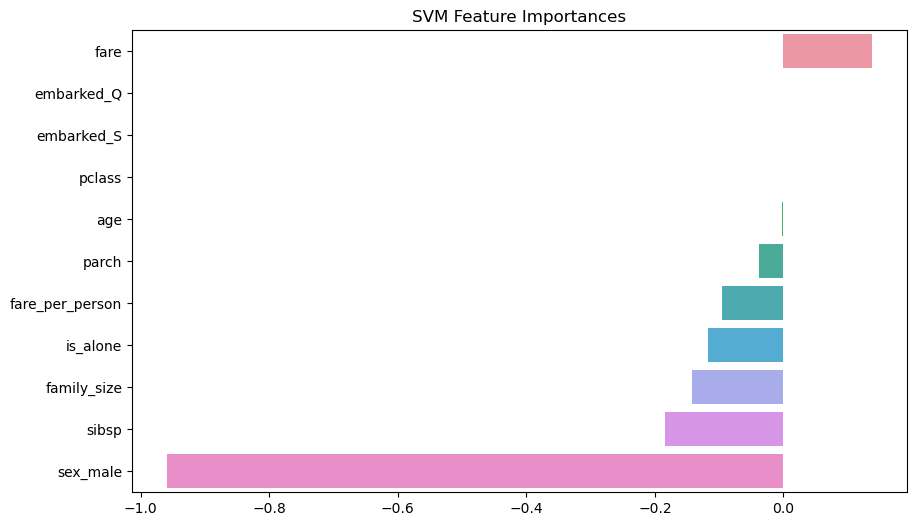

In [32]:
# Feature Importance from SVM
svm_importances = pd.Series(svm_model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=svm_importances, y=svm_importances.index)
plt.title('SVM Feature Importances')
plt.show()

## Model Performance: 
The SVM model performs similarly to the Random Forest and Logistic Regression models with an accuracy of around 77%. It shows a good balance between precision and recall, especially for the class "Not Survived".

## Key Factors for Survival:
- Gender: Being male significantly reduces survival chances.
- Passenger Class: Higher class passengers had better survival rates.
- Family and Companions: Being alone decreased survival chances, while having family members on board increased the chances.
- Age: Younger passengers had better survival rates.
- Fare: Higher fares were associated with higher chances of survival.
- Embarkation Port: Embarkation ports also played a role in survival chances.ances.

# Overall Comparison and Insights
All three models (Random Forest, Logistic Regression, and SVM) show consistent patterns in the factors affecting survival:
- Sex (male): Strongly negativand positive e impact on survival chances.
- Passenger Class: Strong positive impact, with higher classes having better survival rates.
- Being alone: Negative impact on survival chances.
- Age: Younger passengers had better chances of survival.
- Fare: Higher fare correlates with higher survival chances.hances.